In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

2024-08-05 00:10:47.728178: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-05 00:10:48.985010: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
print(f"Tensor_flow.v.{tf.__version__} ")
# print(f"Keras.v.{keras.version()}")
# tf.config.set_visible_devices([],"GPU")
for device in tf.config.get_visible_devices():
    print(f"Using {device.name}")

Tensor_flow.v.2.16.1 
Using /physical_device:CPU:0


In [3]:
inputs = np.random.random((32, 10, 8))
gru = keras.layers.GRU(4)
output = gru(inputs)
print(output.shape)

gru = keras.layers.GRU(4,
                       return_sequences=True,
                       return_state=True,
                       # use_cudnn=False,
                      )
# gru = keras.Sequential([gru])
# print(gru.reset_after)
whole_sequence_output, final_state = gru(inputs)
# final_state = keras.ops.convert_to_tensor(final_state)
print(whole_sequence_output.shape)

print(final_state.shape)
print(type(final_state))

(32, 4)
(32, 10, 4)
(32, 4)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [4]:
path_to_zip = keras.utils.get_file(
    fname="ukr-eng.zip",
    origin="http://localhost/ukr-eng.zip",
    extract=True,
)
print(path_to_zip)
path_to_file = pathlib.Path(path_to_zip).parent/"ukr.txt"
print(path_to_file)

/home/pug/.keras/datasets/ukr-eng.zip
/home/pug/.keras/datasets/ukr.txt


In [5]:
def file_to_arrays(path_to_file):
    text = path_to_file.read_text(encoding='utf-8').split("\n")
    print(len(text))
    column0_text = []
    column1_text = []
    for i,row in enumerate(text):
        row = row.split("\t")
        if len(row) == 3:
            column0_text.append(row[0])
            column1_text.append(row[1])
        else:
            print(f"SKIP LINE:{i} --->",row)
    return np.array(column0_text), np.array(column1_text)

In [6]:
eng_text, ukr_text = file_to_arrays(path_to_file)
print(len(ukr_text))

159433
SKIP LINE:159432 ---> ['']
159432


In [7]:
def show_uniq_char(iter_text):
    uniq_char = sorted(list(set("\n".join(iter_text).lower())))
    print("".join(uniq_char))
    for i in range(0,len(uniq_char),10):
        print(uniq_char[i:i+10])


In [8]:
def check_chars(chars_list, to_check):
    for char in chars_list:
        for i,row in enumerate(to_check):
            if char in row:
                print(f"INDEX:{i} ---> {char} --->",row)

In [9]:
check_chars(
    ['°', 'º'],
    ukr_text,
)

INDEX:54621 ---> ° ---> Вода замерзає при температурі 0°C.
INDEX:141182 ---> ° ---> Вода замерзає при температурі 0°C.
INDEX:141183 ---> ° ---> Вода замерзає при температурі 0°C.
INDEX:151082 ---> º ---> Вчитель сказав, що вода кипить при температурі 100ºC.


In [10]:
rng = np.random.default_rng()
print(rng.random(10))

[0.10724711 0.05541837 0.24202866 0.1596148  0.53819667 0.47195175
 0.02763826 0.63016351 0.85273844 0.23486302]


In [11]:
BUFFER_SIZE = len(eng_text)
BATCH_SIZE = 64

is_train = rng.random(len(eng_text)) < 0.8

train_raw = (
    tf.data.Dataset
        .from_tensor_slices((eng_text[is_train],ukr_text[is_train]))
        .shuffle(BUFFER_SIZE)
        .batch(BATCH_SIZE)
        )
print(train_raw)
val_raw = (
    tf.data.Dataset
        .from_tensor_slices((eng_text[~is_train],ukr_text[~is_train]))
        .shuffle(BUFFER_SIZE)
        .batch(BATCH_SIZE))
print(val_raw)

<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>


In [12]:
for i in train_raw.take(1):
    print(len(i[0]))
    print()
    print(i[0][:1])
    print()
    print(i[1][:1])

64

tf.Tensor([b"It wasn't hard to convince Tom not to do that."], shape=(1,), dtype=string)

tf.Tensor([b'\xd0\x9f\xd0\xb5\xd1\x80\xd0\xb5\xd0\xba\xd0\xbe\xd0\xbd\xd0\xb0\xd1\x82\xd0\xb8 \xd0\xa2\xd0\xbe\xd0\xbc\xd0\xb0 \xd0\xb7\xd1\x80\xd0\xbe\xd0\xb1\xd0\xb8\xd1\x82\xd0\xb8 \xd1\x86\xd0\xb5 \xd0\xb1\xd1\x83\xd0\xbb\xd0\xbe \xd0\xbd\xd0\xb5\xd1\x81\xd0\xba\xd0\xbb\xd0\xb0\xd0\xb4\xd0\xbd\xd0\xbe.'], shape=(1,), dtype=string)


In [13]:
show_uniq_char(eng_text)


 !"$%&'(),-./0123456789:;?abcdefghijklmnopqrstuvwxyz °éï‘’₂€
['\n', ' ', '!', '"', '$', '%', '&', "'", '(', ')']
[',', '-', '.', '/', '0', '1', '2', '3', '4', '5']
['6', '7', '8', '9', ':', ';', '?', 'a', 'b', 'c']
['d', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm']
['n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w']
['x', 'y', 'z', '\xa0', '°', 'é', 'ï', '‘', '’', '₂']
['€']


In [14]:
check_chars(
    [ 'ï'],
    eng_text,
)

INDEX:37850 ---> ï ---> I'm not that naïve.
INDEX:37851 ---> ï ---> I'm not that naïve.
INDEX:112032 ---> ï ---> Mary is a naïve young actress.


In [15]:
x = tf.constant("Hello! World")
tf.strings.regex_replace(x,"!", r" \0 ")


<tf.Tensor: shape=(), dtype=string, numpy=b'Hello !  World'>

In [16]:
def ukr_string_clener(text):
    text = tf.strings.lower(text,encoding='utf-8')
    text = tf.strings.regex_replace(text, "[á]", "а")
    text = tf.strings.regex_replace(text, "[ó́]", "о")
    text = tf.strings.regex_replace(text, "[ïї]", "ї")
    text = tf.strings.regex_replace(text, "[^ a-zабвгдежзийклмнопрстуфхцчшщыьэюяєіїґ`-]", "")
    text = tf.strings.join(["[START]", text, "[END]"], separator=" ")
    return text

def eng_string_clener(text):
    text = tf.strings.lower(text,encoding='utf-8')
    text = tf.strings.regex_replace(text, "[é]", "e")
    text = tf.strings.regex_replace(text, "[‘’]", "'")
    text = tf.strings.regex_replace(text, 'ï', "i")
    text = tf.strings.regex_replace(text, "[^ a-z'-]", "")
    
    text = tf.strings.join(["[START]", text, "[END]"], separator=" ")
    return text

print(ukr_string_clener("Привіт-світ!").numpy().decode("utf-8"))

[START] привіт-світ [END]


In [17]:
max_vocab_size = 30000

eng2int_processor = keras.layers.TextVectorization(
    standardize=eng_string_clener,
    max_tokens=max_vocab_size,
    ragged=True,
)

ukr2int_processor = keras.layers.TextVectorization(
    standardize=ukr_string_clener,
    # standardize="lower_and_strip_punctuation",
    max_tokens=max_vocab_size,
    ragged=True,
)


# for i in train_raw:
#     print(i[0])



In [ ]:
eng2int_processor.adapt(train_raw.map(lambda context,target: context))
print(eng2int_processor.vocabulary_size())
print(eng2int_processor.get_vocabulary()[:10])

In [19]:
ukr2int_processor.adapt(train_raw.map(lambda context,target: target))
print(ukr2int_processor.vocabulary_size())
# for i in ukr2int_processor.get_vocabulary():
#     if "а" in i:
#         print(i)
print(ukr2int_processor.get_vocabulary()[:10])

28449
['', '[UNK]', '[START]', '[END]', 'я', 'том', 'не', 'що', 'це', 'ти']


In [20]:
x = tf.constant("Hello world")

In [21]:
for eng,ukr in train_raw.take(1):
    # print(ukr2int_processor.get_vocabulary()[eng2int_processor(eng[0])])
    print(ukr2int_processor(ukr[1]))
    break
np.array(ukr2int_processor.get_vocabulary())[ukr2int_processor(ukr[1])]

tf.Tensor([  2  17 617 435   3], shape=(5,), dtype=int64)


array(['[START]', 'він', 'уже', 'чоловік', '[END]'], dtype='<U23')

<class 'tensorflow.python.ops.ragged.ragged_tensor.RaggedTensor'>


Text(0.5, 1.0, 'Mask')

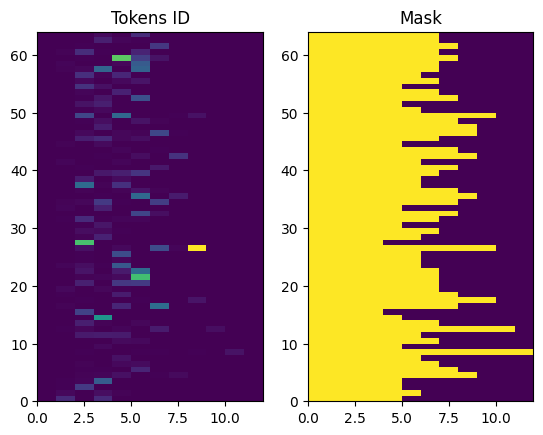

In [22]:
example_tokens = eng2int_processor(eng)
print(type(example_tokens))
plt.subplot(1,2,1)
plt.pcolormesh(example_tokens.to_tensor())
plt.title("Tokens ID")
plt.subplot(1,2,2)
plt.pcolormesh(example_tokens.to_tensor() != 0)
plt.title("Mask")

In [23]:
# xz is this ok
def text_processor(context, target):
    print(context)
    context = eng2int_processor(context).to_tensor()
    # target.to_tensor()
    print(target)
    target = ukr2int_processor(target)
    target_in = target[:,:-1].to_tensor()
    target_out = target[:,1:].to_tensor()
    # target_in = ukr2int_processor(target_in).to_tensor()
    # target_out = ukr2int_processor(target_out).to_tensor()
    return (context, target_in), target_out

In [24]:
train_ds = train_raw.map(text_processor, tf.data.AUTOTUNE)
val_ds = val_raw.map(text_processor, tf.data.AUTOTUNE)

Tensor("args_0:0", shape=(None,), dtype=string)
Tensor("args_1:0", shape=(None,), dtype=string)
Tensor("args_0:0", shape=(None,), dtype=string)
Tensor("args_1:0", shape=(None,), dtype=string)


In [25]:
for context,target in train_ds.take(1):
    print(context[1][0])
    print(target[0])
    break

tf.Tensor([    2     5 12863     0     0     0     0     0     0     0     0], shape=(11,), dtype=int64)
tf.Tensor([    5 12863     3     0     0     0     0     0     0     0     0], shape=(11,), dtype=int64)


In [26]:
UNITS = 256

class Encoder(keras.Model):

    def __init__(self, text_processor,units,**kwargs):
        super().__init__(**kwargs)
        self.text_processor = text_processor
        print(text_processor)
        self.vocab_size = text_processor.vocabulary_size()
        self.units = units
        self.embeddings = keras.layers.Embedding(
            self.vocab_size,
            units,
            mask_zero=True,
            )
        self.rnn = keras.layers.Bidirectional(
            merge_mode="sum",
            layer = keras.layers.GRU(
                units=units,
                return_sequences=True,
                # return_state=True,
                recurrent_initializer="glorot_uniform",
                # use_cudnn=False,
                # unroll=True,
                
            ),
        )
        
    # @tf.function
    def call(self, x):
        print(x.shape)
        x = self.embeddings(x)
        print(x.shape)
        x = self.rnn(x)
        print(x.shape)
        # print(x[0])
        # return tf.constant(x[0]), keras.ops.convert_to_tensor(x[1:])
        return x
    
    def convert_input(self, texts):
        texts = tf.convert_to_tensor(texts)
        if len(texts.shape) == 0:
            texts = tf.convert_to_tensor(texts)[tf.newaxis]
        context = self.text_processor(texts).to_tensor()
        context = self(context)
        return context
    
encoder = Encoder(eng2int_processor, UNITS)
ex_context = encoder(context[0])
# print(ex_context[0].shape)
# print(context[0].shape)
# print(ex_context[0].shape)
# # proc.convert_input(eng)
# print(type(ex_context[0]))
# for i in ex_context[1]:
#     print(type(i))

(64, 12)
(64, 12, 256)
(64, 12, 256)


(64, 13)
(64, 13, 256)
(64, 13, 256)
64


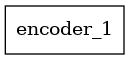

In [27]:
# context[0] vector to translate
# context[1] input last output
# target y
# tf.config.run_functions_eagerly(True)
# print(context[0].shape)
x = np.random.random((64,13))
encoder = Encoder(eng2int_processor, UNITS)
print(len(encoder(x)))
# test_model = keras.Sequential([Encoder(eng2int_processor, UNITS)])
# test = test_model(x)
keras.utils.plot_model(encoder, show_shapes=True)

In [28]:
class CrossAttention(keras.layers.Layer):

    def __init__(self, units, **kwargs):
        super().__init__(**kwargs)
        self.mha = keras.layers.MultiHeadAttention(key_dim=units, num_heads=1, **kwargs)
        self.layernorm = keras.layers.LayerNormalization()
        self.add = keras.layers.Add()
    
    def call(self, x, context):
        # print(x.shape,0)
        attn_output, attn_scores = self.mha(
            query=x,
            value=context,
            return_attention_scores=True,
        )
        # print(attn_output.shape,1)
        # print(attn_scores.shape,2)
        attn_scores = tf.reduce_mean(attn_scores, axis=1)
        # print(attn_scores.shape,3)
        self.last_attention_weights = attn_scores
        x = self.add([x, attn_output])
        # print(x.shape,4)
        x = self.layernorm(x)
        # print(x.shape,5)
        return x

In [29]:
attention_layer = CrossAttention(UNITS)
embed = keras.layers.Embedding(ukr2int_processor.vocabulary_size(),
                               output_dim=UNITS,
                               mask_zero=True,
                               )
ex_tar = embed(context[1])
result = attention_layer(ex_tar, ex_context)

In [30]:
attention_layer.last_attention_weights[0].numpy().sum(axis=-1)

array([1.        , 1.        , 1.        , 0.99999994, 0.99999994,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994], dtype=float32)

Text(0.5, 1.0, 'Mask')

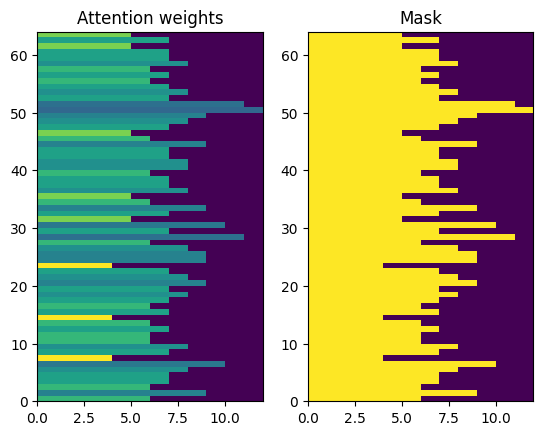

In [31]:
attention_weights = attention_layer.last_attention_weights
mask=(context[0] != 0).numpy()

plt.subplot(1, 2, 1)
plt.pcolormesh(mask*attention_weights[:, 0, :])
plt.title('Attention weights')

plt.subplot(1, 2, 2)
plt.pcolormesh(mask)
plt.title('Mask')


In [32]:
class Decoder(keras.layers.Layer):

    def __init__(self, text_processor, units, **kwargs):
        super().__init__(**kwargs)
        self.text_processor = text_processor
        self.vocab_size = text_processor.vocabulary_size()
        self.word_to_id = keras.layers.StringLookup(
            vocabulary=text_processor.get_vocabulary(),
            mask_token="",
            oov_token="[UNK]",       
        )
        self.id_to_word = keras.layers.StringLookup(
            vocabulary=text_processor.get_vocabulary(),
            mask_token="",
            oov_token="[UNK]",
            invert=True,            
        )
        self.word_to_id = keras.layers.StringLookup(
            vocabulary=text_processor.get_vocabulary(),
            mask_token="",
            oov_token="[UNK]",     
        )
        self.start_token = self.word_to_id("[START]")
        self.end_token = self.word_to_id("[END]")

        self.units = units
        self.embeding = keras.layers.Embedding(
            self.vocab_size,
            units,
            mask_zero=True,
            )
        self.rnn = keras.layers.GRU(
            units,
            return_sequences=True,
            return_state=True,
            recurrent_initializer="glorot_uniform",
        )
        self.attention = CrossAttention(units)
        self.output_layer = keras.layers.Dense(self.vocab_size)
        
    # @tf.function
    def call(self, context, x, state=None, return_state=False):
        # print(x.shape)
        x = self.embeding(x)
        # print(x.shape)
        x, state = self.rnn(x, initial_state=state)
        # x, state = x_and_state[0], x_and_state[1:]
        # print(x.shape)END
        x = self.attention(x, context)
        # print(x.shape)
        self.last_attention_weights = self.attention.last_attention_weights
        logits = self.output_layer(x)
        # print(logits.shape)
        if return_state:
            return logits, state
        else:
            return logits 


    def get_initial_state(self, context):
        batch_size = tf.shape(context)[0]
        start_tokens = tf.fill((batch_size,1), self.start_token)
        done = tf.zeros((batch_size,1), dtype=tf.bool)
        embedded = self.embeding(start_tokens)
        # print(embedded.shape)
        # print(self.rnn.get_initial_state(embedded))
        return start_tokens, done, self.rnn.get_initial_state(embedded) # inputs only for tf<=2.15 else batchsize


    def tokens_to_text(self, tokens):
        words = self.id_to_word(tokens)
        result = tf.strings.reduce_join(words, axis=-1, separator=" ")
        result = tf.strings.regex_replace(result, "^ *\[START\] *", "")
        result = tf.strings.regex_replace(result, " *\[END\] *$", "")
        return result


    def get_next_token(self, context, next_token, done, state, temperature=0.0):
        logits, state = self(
            context, next_token,
            state=state,
            return_state=True,
        )
        if temperature == 0.0:
            next_token = tf.argmax(logits, axis=-1)
        else:
            logits = logits[:,-1,:] / temperature
            next_token = tf.random.categorical(logits, num_samples=1)
        done = done | (next_token == self.end_token)
        next_token = tf.where(done, tf.constant(0, dtype=tf.int64), next_token)
        return next_token, done, state
        
        

In [33]:
decoder = Decoder(ukr2int_processor, UNITS)
logits = decoder(ex_context, context[1])
# print(logits[0])
print(f'encoder output shape: (batch, s, units) {ex_context.shape}')
print(f'input target tokens shape: (batch, t) {context[1].shape}')
print(f'logits shape shape: (batch, target_vocabulary_size) {logits.shape}')

encoder output shape: (batch, s, units) (64, 12, 256)
input target tokens shape: (batch, t) (64, 11)
logits shape shape: (batch, target_vocabulary_size) (64, 11, 28449)


In [34]:
tf.random.categorical([[-5555555555555.0,5555555555.0]], 5)

<tf.Tensor: shape=(1, 5), dtype=int64, numpy=array([[1, 1, 1, 1, 1]])>

In [35]:
next_token, done, state = decoder.get_initial_state(ex_context)
tokens = []

for _ in range(10):
    next_token, done, state = decoder.get_next_token(
        ex_context,next_token, done, state,temperature=1.0)
    tokens.append(next_token)

tokens = tf.concat(tokens, axis=-1)
tokens = decoder.tokens_to_text(tokens)

# print(tokens)
for i in range(5):
    print(tokens.numpy()[i].decode("utf-8"))
    
    

поступати посадив блискавка пліт рабства погуляю помаранчеві французьску запізнюємося безсмертний
зайдуть пили застуди нещасних позавчора багатообіцяюче насміхналися справді губка персонаж
саб співпрацюєш вирішуєш збалансовану втрачай вільному відданості погодувати улюбленими сповілнився
розслідуємо природа старанний дістанетеся антиматерія тижнів сходиться справді місія припини
прочекав двомовному усміхнулася ей іноди прибиральницею жодну новинам бідність лавочку


In [36]:
class Translator(keras.Model):
    def __init__(self, units,
                 context_text_processor,
                 target_text_processor,
                 **kwargs
                ):
        super().__init__(**kwargs)
        print(context_text_processor)
        self.encoder = Encoder(context_text_processor, units)
        self.decoder = Decoder(target_text_processor, units)

    def call(self, inputs):
        context, x = inputs
        context = self.encoder(context)
        logits = self.decoder(context, x)
        return logits

    def translate(self, texts,
                  max_lengs=50,
                  temperature=0.0,
                 ):
        context = self.encoder.convert_input(texts)
        batch_size = tf.shape(texts)[0]

        tokens = []
        attention_weights = []
        next_token, done, state = self.decoder.get_initial_state(context)
        for _ in range(max_lengs):
            next_token, done, state = self.decoder.get_next_token(context, next_token, done, state, temperature)
            # print(self.decoder.get_next_token(context, next_token, done, state, temperature))
            tokens.append(next_token)
            attention_weights.append(self.decoder.last_attention_weights)

            if tf.executing_eagerly() and tf.reduce_all(done):
                break

        tokens = tf.concat(tokens, axis=-1)
        print(tokens)
        result = self.decoder.tokens_to_text(tokens)

        self.last_attention_weights = tf.concat(attention_weights, axis=1)
        return result


    def plot_attention(self, text, **kwargs):
        assert isinstance(text, str)
        output = self.translate([text],**kwargs)
        output = output.numpy()[0].decode("utf-8")
        output = ["[START]"] + output.split() + ["[END]"]

        text = eng_string_clener(text)
        text = text.numpy().decode("utf-8").split()

        attention = self.last_attention_weights[0]
        # print(output)
        # print(text)
        # print(attention)
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(1,1,1)
        ax.matshow(attention,
                   cmap="viridis",
                   vmin=0.0,
                  )
        fontdict = {"fontsize":14}
        ax.set_xticklabels([""] + text, fontdict=fontdict, rotation=90)
        ax.set_yticklabels(output, fontdict=fontdict)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
        ax.set_xlabel("Input text")
        ax.set_ylabel("OutputInput text")

        


In [37]:
model = Translator(UNITS, eng2int_processor, ukr2int_processor)
# model.load_weights("restart_weights.ckpt")


In [38]:
print(eng2int_processor)

# model.plot_attention("Hello WORLD! this is not end")
print(f'Context tokens, shape: (batch, s, units) {context[0].shape}')
print(f'Target tokens, shape: (batch, t) {context[1].shape}')
print(f'logits, shape: (batch, t, target_vocabulary_size) {logits.shape}')

Context tokens, shape: (batch, s, units) (64, 12)
Target tokens, shape: (batch, t) (64, 11)
logits, shape: (batch, t, target_vocabulary_size) (64, 11, 28449)


In [39]:
def masked_loss(y_true, y_pred):
    loss_fn = keras.losses.SparseCategoricalCrossentropy(
        from_logits=True,
        reduction="none",
    )
    loss = loss_fn(y_true, y_pred)
    mask = tf.cast(y_true != 0, loss.dtype)
    loss *= mask
    return tf.reduce_sum(loss)/tf.reduce_sum(mask)

def masked_acc(y_true, y_pred):
    y_pred = tf.argmax(y_pred, axis=-1)
    y_pred = tf.cast(y_pred, y_true.dtype)

    is_match = tf.cast(y_true == y_pred, tf.float32)
    mask = tf.cast(y_true != 0, tf.float32)
    return tf.reduce_sum(is_match)/tf.reduce_sum(mask)

In [40]:
model.compile(
    optimizer="adam",
    loss=masked_loss,
    metrics=[masked_acc],
)

In [41]:
# model.load_weights("restart_weights.ckpt")

In [42]:
# history = model.fit(
#     train_ds,
#     epochs=1,
#     validation_data=val_ds,
# )

In [ ]:
history = model.fit(
    train_ds.repeat(), 
    epochs=25,
    steps_per_epoch = 400,
    validation_data=val_ds,
    validation_steps = 50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=3)])

In [50]:
model.evaluate(val_ds,return_dict=True)

503/503 [==============================] - 42s 82ms/step - loss: 1.6423 - masked_acc: 0.7080


{'loss': 1.6423089504241943, 'masked_acc': 0.707966148853302}

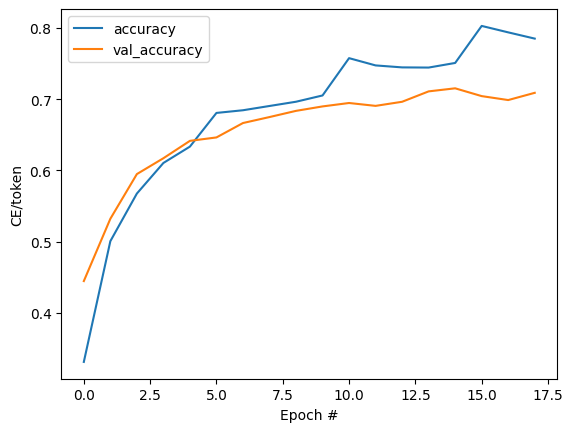

In [51]:
plt.plot(history.history['masked_acc'], label='accuracy')
plt.plot(history.history['val_masked_acc'], label='val_accuracy')
plt.xlabel('Epoch #')
plt.ylabel('CE/token')
plt.legend()

In [ ]:
# tf.executing_eagerly()
x = [
    "Hello world",
    "Maksim break tensorflow",
    "I am trying to run this model, but it is difficult to do",
    "pugs are awesome",
    "water is wet",
    "Water is usually wet at all times when it's not rigid or gas",
    "Happy Birthday to you Tom!",
    "Hello WORLD! this is not end"]
                  
y = model.translate(x, temperature=0.1)
for i in range(len(y)):
    print(y[i].numpy().decode("utf-8"))
    model.plot_attention(x[i][0], temperature=1.0)

# for i in x:
#    model.plot_attention(i[0])


(8, 15)
(8, 15, 256)
(8, 15, 256)
tf.Tensor(
[[ 1137     0     0     0     0     0     0     0     0     0     0]
 [10872  7038  6433     0     0     0     0     0     0     0     0]
 [    4   765  2069    11   124  6527   152     8   381    26     0]
 [  597   591     0     0     0     0     0     0     0     0     0]
 [  724 14214     0     0     0     0     0     0     0     0     0]
 [ 4263   339  1094  7604    22   953     7    17     6  6447     0]
 [22928  1263    81    47   119     0     0     0     0     0     0]
 [ 1137  1995   432   144     8  6233     0     0     0     0     0]], shape=(8, 11), dtype=int64)
привіт          
кидай спроби пахнуть        
я намагаюся бігти на цю модель але це складно зробити 
чудово виглядаєш         
вода мокра         
їжте зазвичай постійно запізнюєтеся до всього що він не отримає 
многая літа для вас томе      
привіт дорогі роботи - це скінчиться     


In [54]:
model.save_weights("restart_weights.ckpt", overwrite=True)

(1, 15)
(1, 15, 256)
(1, 15, 256)
tf.Tensor([[   4  765 2069   11  124 6527  152    8  381   26    0]], shape=(1, 11), dtype=int64)


/tmp/ipykernel_7785/224119028.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([""] + text, fontdict=fontdict, rotation=90)
/tmp/ipykernel_7785/224119028.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(output, fontdict=fontdict)


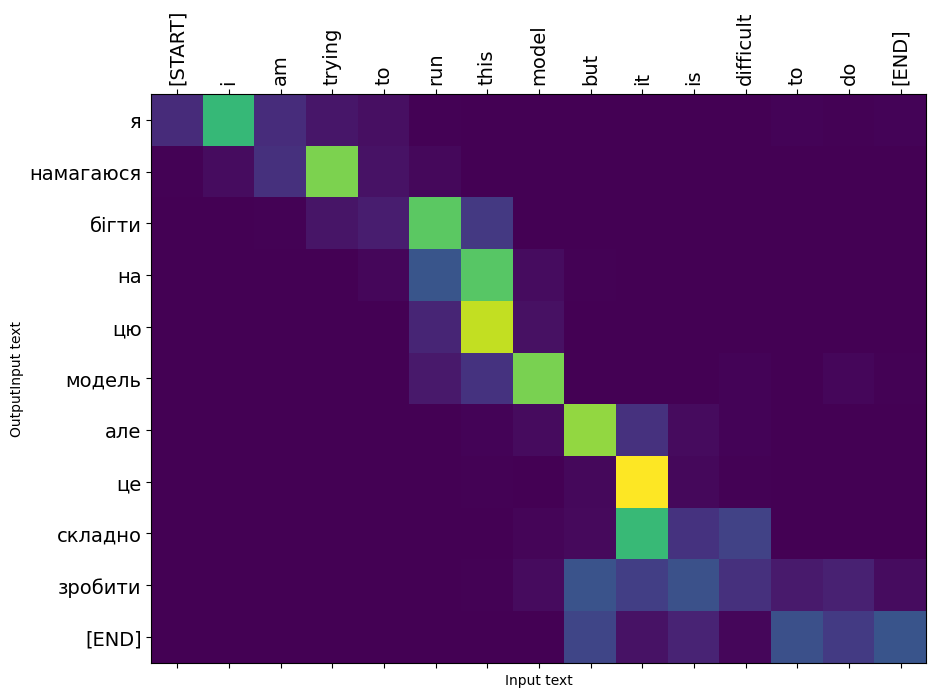

In [72]:
model.plot_attention("I am trying to run this model, but it is difficult to do")

(1, 58)
(1, 58, 256)
(1, 58, 256)
tf.Tensor(
[[22797  6371   536    10 27259 11767    81  3521   198    22   893  7808
   7808  7808  7808  7808  7808  7808  7808  7808  7808  7808  7808  7808
   7808  7808  7808  7808  7808  7808  7808  7808  7808  7808  7808  7808
   7808  7808  7808  7808  7808  7808  7808  7808  7808  7808  7808  7808
   7808  7808]], shape=(1, 50), dtype=int64)
мікроавтобус поливати квіти у виробництві ядерної для двадцяти років до кімнати виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла виникла
(1, 58)
(1, 58, 256)
(1, 58, 256)
tf.Tensor(
[[22797  6371   536    10 27259 11767    81  3521   198    22   893  7808
   7808  7808  7808  7808  7808  7808  7808  7808  7808  7808  7808  7808
   7808  7808  7808  7808  78

/tmp/ipykernel_7785/224119028.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([""] + text, fontdict=fontdict, rotation=90)
/tmp/ipykernel_7785/224119028.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(output, fontdict=fontdict)


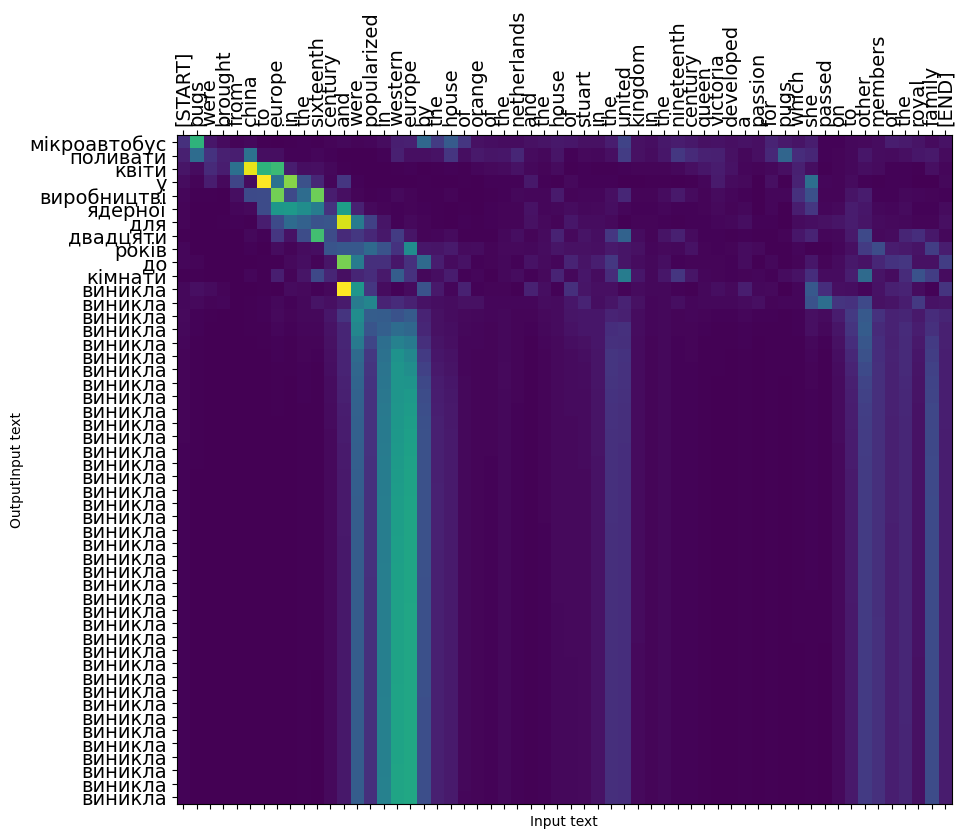

In [65]:
long_text = "Pugs were brought from China to Europe in the sixteenth century and "\
            "were popularized in Western Europe by the House of Orange of the Netherlands, "\
            "and the House of Stuart. In the United Kingdom, in the nineteenth century, "\
            "Queen Victoria developed a passion for Pugs which she passed on to other members of the royal family."
print(model.translate([long_text], temperature=0.0).numpy()[0].decode())
model.plot_attention(long_text, temperature=0.0)

In [180]:
class Export(tf.Module):
    def __init__(self, model):
        self.model = model

    @tf.function(input_signature=[tf.TensorSpec(shape=[None], dtype=tf.string)])
    def translate(self, inputs):
        return self.model.translate(inputs)

In [181]:
export = Export(model)


In [183]:
%%time
# x = tf.constant(x[0])
print(tf.strings.reduce_join(export.translate(x), axis=-1,separator="\n").numpy().decode())

привіт                                                 
кидай спроби пахнуть                                               
я намагаюся бігти на цю модель але це складно зробити                                        
чудово виглядаєш                                                
вода мокра                                                
їжте зазвичай постійно запізнюєтеся до всього що він не отримає                                        
многая літа для вас томе                                             
привіт дорогі                                                
CPU times: user 297 ms, sys: 56.5 ms, total: 353 ms
Wall time: 382 ms


In [185]:
%%time
# model.translate(x)
print(tf.strings.reduce_join(model.translate(x), axis=-1,separator="\n").numpy().decode())

(8, 15)
(8, 15, 256)
(8, 15, 256)
tf.Tensor(
[[ 1137     0     0     0     0     0     0     0     0     0     0]
 [10872  7038  6433     0     0     0     0     0     0     0     0]
 [    4   765  2069    11   124  6527   152     8   381    26     0]
 [  597   591     0     0     0     0     0     0     0     0     0]
 [  724 14214     0     0     0     0     0     0     0     0     0]
 [ 4263   339  1094  7604    22   953     7    17     6  6447     0]
 [22928  1263    81    47   119     0     0     0     0     0     0]
 [ 1137  1995     0     0     0     0     0     0     0     0     0]], shape=(8, 11), dtype=int64)
привіт          
кидай спроби пахнуть        
я намагаюся бігти на цю модель але це складно зробити 
чудово виглядаєш         
вода мокра         
їжте зазвичай постійно запізнюєтеся до всього що він не отримає 
многая літа для вас томе      
привіт дорогі         
CPU times: user 1.07 s, sys: 30.6 ms, total: 1.1 s
Wall time: 1.04 s


In [ ]:
%%time
tf.saved_model.save(export, "translator",signatures={"serving_default":export.translate})

In [ ]:
reloaded = tf.saved_model.load("translator")

In [189]:
%%time
print(tf.strings.reduce_join(reloaded.translate(x), axis=-1,separator="\n").numpy().decode())

привіт                                                 
кидай спроби пахнуть                                               
я намагаюся бігти на цю модель але це складно зробити                                        
чудово виглядаєш                                                
вода мокра                                                
їжте зазвичай постійно запізнюєтеся до всього що він не отримає                                        
многая літа для вас томе                                             
привіт дорогі                                                
CPU times: user 457 ms, sys: 36.4 ms, total: 493 ms
Wall time: 344 ms
